In [1]:
import pandas as pd
import numpy as np

In [5]:
# loading the dataset
df=pd.read_csv(r"C:\Users\DHANUMANJU\Downloads\train.csv")

In [6]:
# displaying the datset rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# summary statistics 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# cheking the missing values and counting
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# filling the missing values
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\DHANUMANJU\AppData\Local\Temp\ipykernel_3920\3921920036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\DHANUMANJU\AppData\Local\Temp\ipykernel_3920\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [14]:
# droping the useless columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [17]:
# rechecking the missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
# Checking the duplicate rows
df.duplicated().sum()


116

In [20]:
# droping the duplicate rows
df.drop_duplicates(inplace=True)

In [22]:
# confirming the duplicate values
df.duplicated().sum()

0

In [23]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

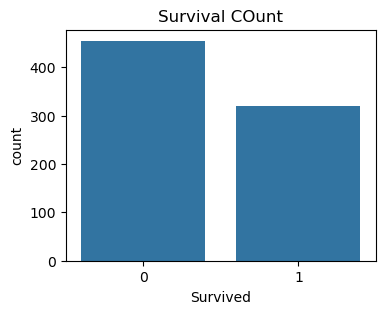

In [28]:
# survival Count
plt.figure(figsize=(4,3))
sns.countplot(x='Survived',data=df)
plt.title("Survival COunt")
plt.show()

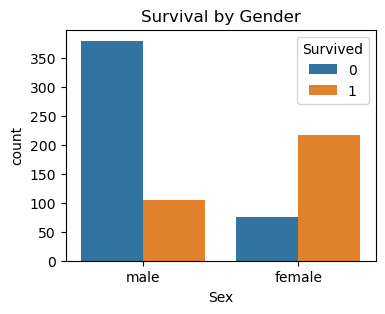

In [29]:
# Survival by gender
plt.figure(figsize=(4,3))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival by Gender")
plt.show()

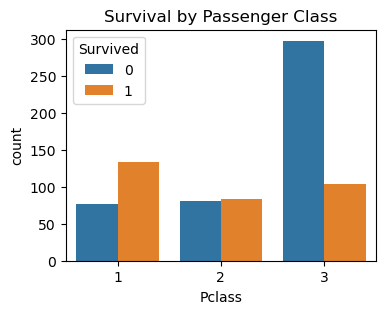

In [30]:
# survival by passenger class
plt.figure(figsize=(4,3))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by Passenger Class")
plt.show()

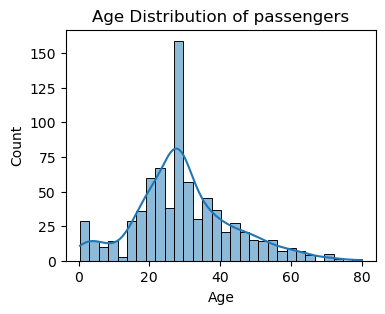

In [31]:
# Age distibution
plt.figure(figsize=(4,3))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Age Distribution of passengers")
plt.show()

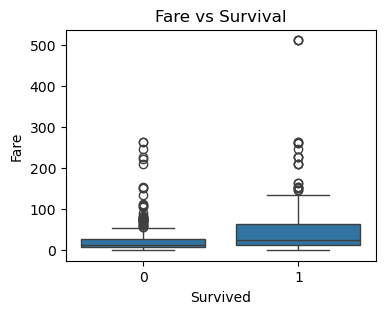

In [32]:
# fare for survived vs not survived
plt.figure(figsize=(4,3))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


In [35]:
# Feature engineering and processing
from sklearn.preprocessing import LabelEncoder

In [36]:
# Creating encoder object
le=LabelEncoder()

In [37]:
# Converting sex column as male/female=0/1
df['Sex']=le.fit_transform(df['Sex'])

In [38]:
# converting embarked column C/Q/S as numbers
df['Embarked']=le.fit_transform(df['Embarked'])

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [40]:
# X contains all features except target
X=df.drop('Survived',axis=1)

In [41]:
# y contains only the target variable
y=df['Survived']

In [42]:
from sklearn.model_selection import train_test_split

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
# Check shapes
X_train.shape, X_test.shape

((620, 7), (155, 7))

In [44]:
# Model building-logistic regression
from sklearn.linear_model import LogisticRegression


In [46]:
# creating logistic regression model
lr=LogisticRegression(max_iter=1000)

In [47]:
#train the model using traing data
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
# predict survival for test data
y_pred_lr=lr.predict(X_test)

In [49]:
#Model building  decision tree

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)


In [50]:
# Model Building Random Forest

from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)


In [51]:
# Import functions to evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [53]:
# Model evaluation-Logistic regression


# Calculate accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

# Generate confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:\n", lr_cm)

# Generate detailed classification report
lr_cr = classification_report(y_test, y_pred_lr)
print("\nLogistic Regression Classification Report:\n", lr_cr)


Logistic Regression Accuracy: 0.7741935483870968

Logistic Regression Confusion Matrix:
 [[77 18]
 [17 43]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.70      0.72      0.71        60

    accuracy                           0.77       155
   macro avg       0.76      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155



In [54]:
# Model evaluation- Decision tree

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:\n", dt_cm)

# Classification report for Decision Tree
dt_cr = classification_report(y_test, y_pred_dt)
print("\nDecision Tree Classification Report:\n", dt_cr)


Decision Tree Accuracy: 0.7161290322580646

Decision Tree Confusion Matrix:
 [[70 25]
 [19 41]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        95
           1       0.62      0.68      0.65        60

    accuracy                           0.72       155
   macro avg       0.70      0.71      0.71       155
weighted avg       0.72      0.72      0.72       155



In [55]:
# Random Forest Evaluation

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Classification report for Random Forest
rf_cr = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:\n", rf_cr)


Random Forest Accuracy: 0.7354838709677419

Random Forest Confusion Matrix:
 [[76 19]
 [22 38]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        95
           1       0.67      0.63      0.65        60

    accuracy                           0.74       155
   macro avg       0.72      0.72      0.72       155
weighted avg       0.73      0.74      0.73       155



In [56]:
# a DataFrame to compare model accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy]
})

#comparison table
accuracy_df


,Model,Accuracy
0,Logistic Regression,0.774194
1,Decision Tree,0.716129
2,Random Forest,0.735484


In [58]:
result='''The final Logistic Regression model achieved an accuracy of 77.4%, 
indicating that it can correctly predict passenger survival 
in nearly 3 out of 4 cases. This demonstrates the effectiveness 
of the selected features and preprocessing steps, and highlights the 
model’s ability to learn meaningful patterns from the data.'''